In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt



In [ ]:
path_train = '/content/drive/MyDrive/Main dataset'
path_test = '/content/drive/MyDrive/Cotton Leaf Disease/test'

In [ ]:
image_size = [224,224]

In [ ]:
inception = InceptionV3(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
inception

In [ ]:
folders = glob('/content/drive/MyDrive/Cotton Leaf Disease/train/*')

In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs = inception.input, outputs = prediction)

In [ ]:
print(len(model.layers))

313


In [ ]:
model.summary()

# 23 million params

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory(path_train,
                                              target_size=(224, 224),
                                              batch_size = 32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(path_test,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3501 images belonging to 6 classes.
Found 120 images belonging to 6 classes.


In [ ]:
r = model.fit_generator(train_set,
                        validation_data= test_set,
                        epochs=20,
                        steps_per_epoch= len(train_set),
                        validation_steps = len(test_set))

<ipython-input-18-c244a7112732>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_set,


Epoch 1/20
110/110 [==============================] - 914s 8s/step - loss: 2.7721 - accuracy: 0.7158 - val_loss: 0.0915 - val_accuracy: 0.9583
Epoch 2/20
110/110 [==============================] - 475s 4s/step - loss: 0.8008 - accuracy: 0.8726 - val_loss: 0.9362 - val_accuracy: 0.8750
Epoch 3/20
110/110 [==============================] - 481s 4s/step - loss: 0.8464 - accuracy: 0.8872 - val_loss: 0.0661 - val_accuracy: 0.9833
Epoch 4/20
110/110 [==============================] - 485s 4s/step - loss: 0.4908 - accuracy: 0.9260 - val_loss: 0.0196 - val_accuracy: 0.9917
Epoch 5/20
110/110 [==============================] - 480s 4s/step - loss: 0.6665 - accuracy: 0.9157 - val_loss: 0.2404 - val_accuracy: 0.9583
Epoch 6/20
110/110 [==============================] - 478s 4s/step - loss: 0.5389 - accuracy: 0.9369 - val_loss: 0.0922 - val_accuracy: 0.9833
Epoch 7/20
110/110 [==============================] - 473s 4s/step - loss: 0.5358 - accuracy: 0.9406 - val_loss: 0.0649 - val_accuracy: 0.9750

In [ ]:
print("Accuracy:",r.history['accuracy'][-1])

Accuracy: 0.9631533622741699


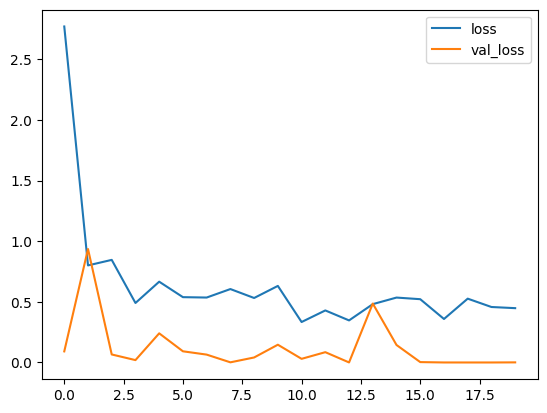

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig('lossVal_loss_inceptionv3')

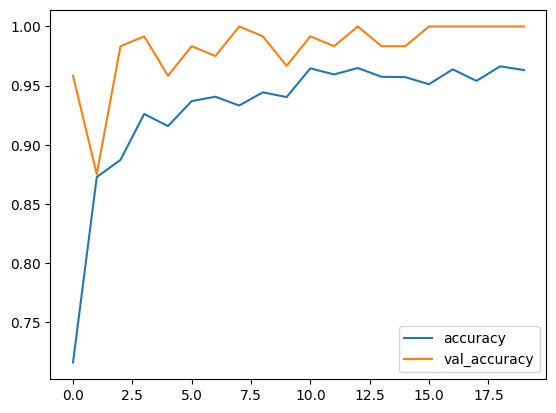

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('acc_val_acc_inceptionv3')


In [ ]:
test_set.filenames

['Aphids/26.jpg',
 'Aphids/27.jpg',
 'Aphids/28.jpg',
 'Aphids/29.jpg',
 'Aphids/30.jpg',
 'Aphids/31.jpg',
 'Aphids/32.jpg',
 'Aphids/33.jpg',
 'Aphids/34.jpg',
 'Aphids/35.jpg',
 'Aphids/36.jpg',
 'Aphids/37.jpg',
 'Aphids/38.jpg',
 'Aphids/39.jpg',
 'Aphids/40.jpg',
 'Aphids/Copy of Copy of 21.jpg',
 'Aphids/Copy of Copy of 22.jpg',
 'Aphids/Copy of Copy of 23.jpg',
 'Aphids/Copy of Copy of 24.jpg',
 'Aphids/Copy of Copy of 25.jpg',
 'Army worm/26.jpg',
 'Army worm/27.jpg',
 'Army worm/28.jpg',
 'Army worm/29.jpg',
 'Army worm/30.jpg',
 'Army worm/31.jpg',
 'Army worm/32.jpg',
 'Army worm/33.jpg',
 'Army worm/34.jpg',
 'Army worm/35.jpg',
 'Army worm/36.jpg',
 'Army worm/37.jpg',
 'Army worm/38.jpg',
 'Army worm/39.jpg',
 'Army worm/40.jpg',
 'Army worm/Copy of Copy of 21.jpg',
 'Army worm/Copy of Copy of 22.jpg',
 'Army worm/Copy of Copy of 23.jpg',
 'Army worm/Copy of Copy of 24.jpg',
 'Army worm/Copy of Copy of 25.jpg',
 'Bacterial Blight/26.jpg',
 'Bacterial Blight/27.jpg',
 'Ba

In [ ]:
y_pred = model.predict(test_set)
y_pred

4/4 [==============================] - 15s 3s/step


array([[1.68662992e-36, 2.71225398e-37, 1.81896099e-32, 1.05769759e-31,
        0.00000000e+00, 9.99999940e-01],
       [0.00000000e+00, 9.99999940e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.99999940e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.99999940e-01],
       [6.42375352e-26, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.99999940e-01],
       [9.00437194e-25, 6.35463521e-02, 9.36453700e-01, 1.10646264e-32,
        6.24957357e-34, 1.40599781e-08],
       [0.00000000e+00, 9.99999940e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [5.25996576e-32, 0.00000000e+00, 1.06618743e-33, 9.99999940e-01,
        3.92633911e-35, 1.60197978e-24],
       [0.00000000e+00, 9.99999940e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 

In [ ]:
y_pred.shape

In [ ]:
final_pred = np.argmax(y_pred, axis=1)
final_pred

In [ ]:
model.save('model_inceptionv3.h5')

In [ ]:
from tensorflow.keras.models import load_model

model=load_model('model_inceptionv3.h5')

In [ ]:
y_pred = model.predict(test_set)
len(y_pred)

In [ ]:
y_pred = model.predict(test_set)
y_pred_fin = np.argmax(y_pred, axis=1)
y_pred_fin

4/4 [==============================] - 15s 3s/step


array([2, 2, 4, 1, 5, 2, 1, 2, 4, 2, 1, 0, 4, 1, 5, 0, 2, 4, 1, 0, 0, 2,
       4, 0, 2, 0, 1, 5, 4, 0, 4, 0, 2, 0, 3, 4, 5, 2, 0, 5, 3, 4, 0, 1,
       4, 3, 1, 4, 3, 5, 0, 1, 5, 0, 5, 5, 2, 4, 2, 4, 4, 0, 0, 2, 1, 2,
       3, 0, 5, 3, 1, 3, 5, 1, 1, 1, 5, 3, 1, 5, 3, 3, 4, 2, 3, 1, 2, 5,
       4, 5, 3, 0, 4, 3, 1, 3, 3, 4, 5, 0, 4, 1, 5, 3, 3, 5, 2, 2, 0, 5,
       1, 3, 5, 3, 3, 2, 4, 2, 1, 0])